# Математическая статистика
## Практическое задание 5

В данном задании предлагается провести некоторое исследование модели линейной регрессии и критериев для проверки статистических гипотез, в частности применить этим модели к реальным данным.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 5"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `5.N.ipynb` и `5.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 7 баллов
* Задача 2 - 2 балла
* Задача 3<font size="5" color="red">\*</font> - 3 балла
* Задача 4 - 2 балла
* Задача 5<font size="5" color="red">\*</font> - 10 баллов
* Задача 6 - 5 баллов
* Задача 7 - 4 балла
* Задача 8<font size="5" color="red">\*</font> - 4 балла
* Задача 9<font size="5" color="red">\*</font> - 10 баллов

## 1. Линейная регрессия

**Задача 1.** По шаблону напишите класс, реализующий линейную регрессию. Интерфейс этого класса в некоторой степени соответствует классу <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression">`LinearRegression`</a> из библиотеки `sklearn`.

In [3]:
import numpy as np
import scipy as scipy
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class LinearRegression:
    def __init__(self):
        super()
        
    def fit(self, X, Y, alpha=0.95):
        ''' Обучение модели. Предполагается модель Y = X * theta + epsilon, 
            где X --- регрессор, Y --- отклик,
            а epsilon имеет нормальное распределение с параметрами (0, sigma^2 * I_n).
            alpha --- уровень доверия для доверительного интервала.
        '''
        
        self.n, self.k = X.shape
        A = np.linalg.inv(X.T.dot(X))
        # МНК оценка.
        self.theta = A.dot(X.T).dot(Y)
        sq = (Y - X.dot(self.theta))
        # Несмещенная оценка для sigma^2.
        self.sigma_sq = sq.T.dot(sq) / (self.n - self.k)
        df_ = self.n - self.k
        # Доверительные интервалы для коэффициентов (матрица расмера k x 2)
        self.conf_int = np.array([(self.theta[i] - np.sqrt(A[i][i] * self.sigma_sq) 
                                       * sps.t.ppf(q = (alpha + 1) / 2, df = df_), 
                                  (self.theta[i] - np.sqrt(A[i][i] * self.sigma_sq) 
                                       * sps.t.ppf(q = (1 - alpha) / 2, df = df_))) 
                                  for i in range(self.k)])
        self.conf_int = self.conf_int.reshape((self.k,2))

        return self
    
    def summary(self):
        print('Linear regression on %d features and %d examples' % (self.k, self.n))
        print('Sigma: %.6f' % self.sigma_sq)
        print('\t\tLower\t\tEstimation\tUpper')
        for j in range(self.k):
            print('theta_%d:\t%.6f\t%.6f\t%.6f' % (j, self.conf_int[j, 0], 
                                                   self.theta[j], self.conf_int[j, 1]))
        
    def predict(self, X):
        ''' Возвращает предсказание отклика на новых объектах X. '''
        
        Y_pred = X.dot(theta)
        return Y_pred

Загрузите данные о потреблении мороженного в зависимости от температуры воздуха и цены (файл `ice_cream.txt`).
Примените реализованный выше класс линейной регрессии к этим данным предполагая, что модель имеет вид $ic = \theta_1 + \theta_2\ t$, где $t$ --- температура воздуха (столбец `temp`), $ic$ --- постребление мороженного в литрах на человека (столбец `IC`).
Значения температуры предварительно переведите из Фаренгейта в Цельсий [(Фаренгейт — 32) / 1,8 = Цельсий].

К обученной модели примените фунцию `summary` и постройте график регрессии, то есть график прямой $ic = \widehat{\theta}_1 + \widehat{\theta}_2\ t$, где $\widehat{\theta}_1, \widehat{\theta}_2$ --- МНК-оценки коэффициентов.
На график нанесите точки выборки.
Убедитесь, что построейнный график совпадает с графиком из презентации с первой лекции, правда, с точностью до значений температура (она была неправильно переведена из Фаренгейта в Цельсий).

In [5]:
ice_cream = pd.read_table('ice_cream.txt')

In [6]:
data = np.array(ice_cream.values)
print(data[:5])
n = len(data)
temp = ((data[:,4] - 32) / 1.8).reshape((n, 1))
on = np.ones(n).reshape((n,1))
X = np.hstack((on, temp))
print(X[:5])
Y = data[:,1].reshape(n,1)
print(Y[:5])

[[  1.      0.386   0.27   78.     41.     56.      0.   ]
 [  2.      0.374   0.282  79.     56.     63.      0.   ]
 [  3.      0.393   0.277  81.     63.     68.      0.   ]
 [  4.      0.425   0.28   80.     68.     69.      0.   ]
 [  5.      0.406   0.272  76.     69.     65.      0.   ]]
[[  1.           5.        ]
 [  1.          13.33333333]
 [  1.          17.22222222]
 [  1.          20.        ]
 [  1.          20.55555556]]
[[ 0.386]
 [ 0.374]
 [ 0.393]
 [ 0.425]
 [ 0.406]]


In [7]:
solver = LinearRegression()
solver.fit(X, Y)
solver.summary()

Linear regression on 2 features and 30 examples
Sigma: 0.001786
		Lower		Estimation	Upper
theta_0:	0.283276	0.306298	0.329319
theta_1:	0.003831	0.005593	0.007355


In [8]:
np.linalg.inv(X.T.dot(X))

array([[ 0.07072257, -0.00393571],
       [-0.00393571,  0.00041429]])

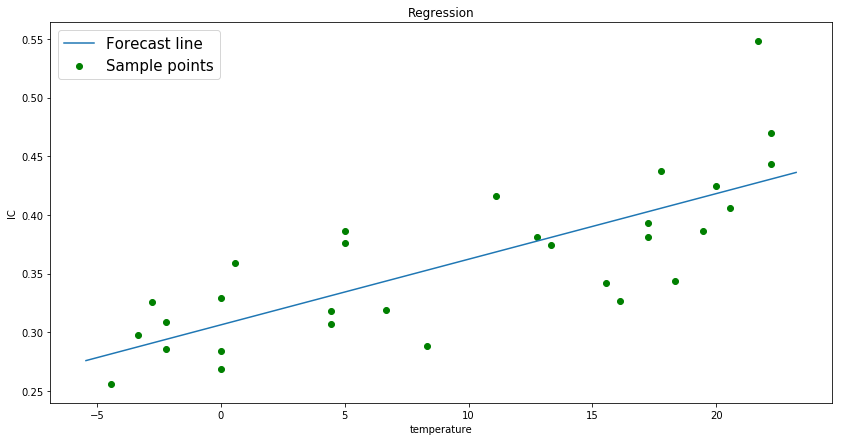

In [9]:
# Строим графики.
def show_results(solver, line):
    fig = plt.figure(figsize=(14,7))
    thetas = solver.theta
    t_min = min(temp) - 1
    t_max = max(temp) + 1
    t = np.arange(t_min, t_max, 0.005)
    plt.plot(t, line(t, thetas), label="Forecast line")
    plt.scatter(temp, Y, color="g", label="Sample points")
    plt.title("Regression")
    plt.xlabel("temperature")
    plt.ylabel("IC")
    plt.legend(fontsize=15, loc=2)
    plt.show()
line = lambda x, thetas: thetas[0] + thetas[1] * x
show_results(solver, line)

Теперь учтите влияние года (столбец `Year`) для двух случаев:
* модель $ic = \theta_1 + \theta_2\ t + \theta_3 y_1 + \theta_4 y_2$, где $y_1 = I\{1\ год\}, y_2 = I\{2\ год\}$. Поясните, почему нельзя рассмативать одну переменную $y$ --- номер года.
* для каждого года рассматривается своя линейная зависимость $ic = \theta_1 + \theta_2\ t$.

В каждом случае нарисуйте графики. Отличаются ли полученные результаты? От чего это зависит? Как зависит потребление мороженного от года? 

Linear regression on 4 features and 30 examples
Sigma: 0.001016
		Lower		Estimation	Upper
theta_0:	0.251176	0.277050	0.302923
theta_1:	0.004741	0.006095	0.007449
theta_2:	-0.011237	0.016491	0.044218
theta_3:	0.041535	0.074307	0.107078
None


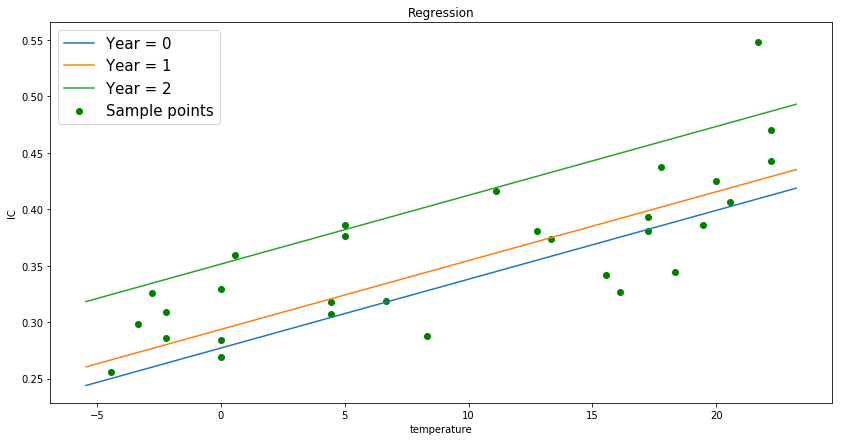

In [10]:
y = np.array(
    [np.array([1 if x == 0 else 0 for x in data[:, 6]]).reshape(n,1),
     np.array([1 if x == 1 else 0 for x in data[:, 6]]).reshape(n,1),
     np.array([1 if x == 2 else 0 for x in data[:, 6]]).reshape(n,1)])

# Первая модель.
solver_2 = LinearRegression()
X_1 = np.hstack((on, temp, y[1], y[2]))
solver_2.fit(X_1, Y)
print(solver_2.summary())
fig = plt.figure(figsize=(14,7))
thetas = solver_2.theta
t_min = min(temp) - 1
t_max = max(temp) + 1
t = np.arange(t_min, t_max, 0.005)
line_1 = lambda i, t, thetas: thetas[0] + thetas[1] * t + thetas[i]
plt.plot(t, line(t, thetas), label="Year = 0")
plt.plot(t, line_1(2, t, thetas), label="Year = 1")
plt.plot(t, line_1(3, t, thetas), label="Year = 2")
plt.scatter(temp, Y, color="g", label="Sample points")
plt.title("Regression")
plt.xlabel("temperature")
plt.ylabel("IC")
plt.legend(fontsize=15, loc=2)
plt.show()

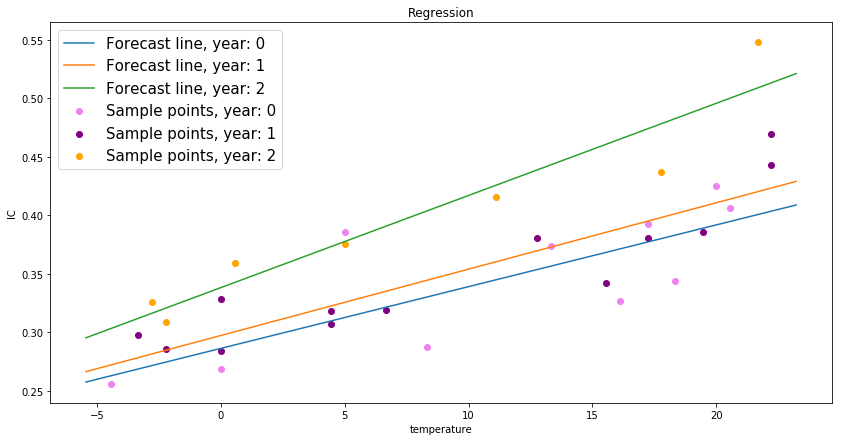

In [11]:
# Для каждого года рассмотрим свою линейную зависимость.
y_s = np.array(
    [np.sum([1 if x == 0 else 0 for x in data[:, 6]]),
     np.sum([1 if x == 1 else 0 for x in data[:, 6]]),
     np.sum([1 if x == 2 else 0 for x in data[:, 6]])])
sizes = np.cumsum(y_s)
colors = ['violet', 'purple', 'orange']
def show_year_results():
    fig = plt.figure(figsize=(14,7))
    t_min = min(temp) - 1
    t_max = max(temp) + 1
    t = np.arange(t_min, t_max, 0.005)
    
    for i in range(3):
        X = Y = tmp = []
        if i == 0:
            X = np.hstack((on[:sizes[0]], temp[:sizes[0]]))
            Y = data[:sizes[0],1]
            tmp = temp[:sizes[0]]
        else:
            tmp = temp[sizes[i-1]:sizes[i]]
            X = np.hstack((on[sizes[i-1]:sizes[i]], temp[sizes[i-1]:sizes[i]]))
            Y = data[sizes[i-1]:sizes[i], 1]
        cur_solver = LinearRegression()
        cur_solver.fit(X, Y)
        thetas = cur_solver.theta
        plt.plot(t, line(t, thetas), label="Forecast line, year: " + str(i))
        plt.scatter(tmp, Y, label="Sample points, year: " + str(i), color = colors[i])
    plt.title("Regression")
    plt.xlabel("temperature")
    plt.ylabel("IC")
    plt.legend(fontsize=15, loc=2)
    plt.show()
show_year_results()

*Нельзя рассматривать одну переменную, потому что абсолютное значение не года не несет для регрессии информации, мы должны учитывать каждый год как индикатор, так как он влияет на все значения в своей подвыборке. *

*В зависимости от года меняется спрос на мороженное, видно что в год с номером два, употребление мороженного было больше, при той же температуре, что и в год с номером 1. Так же годы 0 и 1 похожи по наклону графиков, а в год с номером 2 прямая наклонена сильнее *

Наконец, обучите модель на предсказание потребления мороженного в зависимости от всех переменных.
Не забудьте, что для года нужно ввести две переменных.
Для полученной модели выведите `summary`.

In [12]:
solver_all = LinearRegression()
# Не забываем привести к нужной размерности второй столбец температуры.
X_all = np.hstack((on, data[:,0].reshape(n,1), data[:,2:4], temp, ((data[:,5] - 32) / 1.8).reshape(n,1), y[1], y[2]))
solver_all.fit(X_all, Y)
print(solver_all.summary())

Linear regression on 8 features and 30 examples
Sigma: 0.000885
		Lower		Estimation	Upper
theta_0:	0.011829	0.596645	1.181460
theta_1:	-0.008863	-0.004508	-0.000154
theta_2:	-2.321498	-0.636402	1.048693
theta_3:	-0.006058	-0.001509	0.003040
theta_4:	0.004670	0.006645	0.008620
theta_5:	-0.002430	-0.000807	0.000817
theta_6:	0.026010	0.081362	0.136713
theta_7:	0.092651	0.189384	0.286118
None


Но это еще не все.
Постройте теперь линейную регрессию для модели $ic = \theta_1 + \theta_2\ t + \theta_3\ t^2 + \theta_4\ t^3$.
Выведите для нее summary и постройте график предсказания, то есть график кривой $ic = \widehat{\theta}_1 + \widehat{\theta}_2\ t + \widehat{\theta}_3\ t^2 + \widehat{\theta}_4\ t^3$. Хорошие ли получаются результаты?

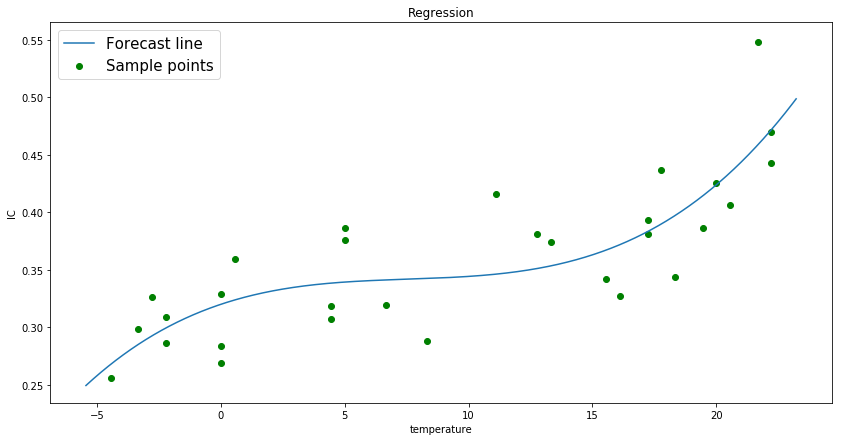

In [13]:
solver_pow = LinearRegression()
X_pow = np.hstack((on, temp, temp ** 2, temp ** 3))
line = lambda t, thetas: thetas[0] + thetas[1] * t + thetas[2] * t ** 2 + thetas[3] * t ** 3
solver_pow.fit(X_pow, Y)
show_results(solver_pow, line)

*Результаты получаются хорошие, но тудно сказать, точнее эта модель предыдущей или нет, нужна большая выборка.*

Чтобы понять, почему так происходит, выведите значения матрицы $(X^T X)^{-1}$ для данной матрицы и посчитайте для нее индекс обусловленности $\sqrt{\left.\lambda_{max}\right/\lambda_{min}}$, где $\lambda_{max}, \lambda_{min}$ --- максимальный и минимальный собственные значения матрицы $X^T X$. Собственные значения можно посчитать функцией <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigvals.html">`scipy.linalg.eigvals`</a>.

Прокомментируйте полученные результаты. Помочь в этом может следующая <a href="https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%BE_%D0%BE%D0%B1%D1%83%D1%81%D0%BB%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8">статья</a>.

In [14]:
A = np.linalg.inv(X_pow.T.dot(X_pow))
print("Матрица A: ", A)
eigenvalues = scipy.linalg.eigvals(A)
print("Собственные значения: ", eigenvalues)
print("Индекс обусловленности: ", np.sqrt(max(eigenvalues) / min(eigenvalues)))

Матрица A:  [[  9.37480084e-02   3.89861423e-03  -1.78656900e-03   6.69029822e-05]
 [  3.89861423e-03   7.18536599e-03  -8.80905447e-04   2.52158328e-05]
 [ -1.78656900e-03  -8.80905447e-04   1.56779604e-04  -5.35416603e-06]
 [  6.69029822e-05   2.52158328e-05  -5.35416603e-06   1.95858936e-07]]
Собственные значения:  [  9.39587724e-02+0.j   7.10180670e-03+0.j   2.97693228e-05+0.j
   1.41790261e-09+0.j]
Индекс обусловленности:  (8140.3947489+0j)


** Вывод:** мы рассмотрели несколько подходов к линейной регрессии. Смотрели на модель в зависимости от того какие признаки мы учитываем. Узнали, что если признак не несет информации в своем абсолютном значении (а разделяется нашу выборку на какие-то части), то его можно учитывать его индикатором. Так же мы увидели что усложнение (повышение степени) в нашей модели привело к изменению ее способности восстанавливать искомую зависимость. А большой индекс обусловленности, говорит, что высока вероятность переобучения, того что наша модель сложнее настоящей и может выдавать плохие результаты на новой выборке.

**Задача 2.** В данной задаче нужно реализовать функцию отбора признаков для линейной регрессии. Иначе говоря, пусть есть модель $y = \theta_1 x_1 + ... + \theta_k x_k$. Нужно определить, какие $\theta_j$ нужно положить равными нулю, чтобы качество полученной модели было максимальным.

Для этого имеющиеся данные нужно случайно разделить на две части --- обучение и тест (train и test). На первой части нужно обучить модель регресии, взяв некоторые из признаков, то есть рассмотреть модель $y = \theta_{j_1} x_{j_1} + ... + \theta_{j_s} x_{j_s}$. По второй части нужно посчитать ее качество --- среднеквадратичное отклонение (mean squared error) предсказания от истинного значения отклика, то есть величину
$$MSE = \sum\limits_{i \in test} \left(\widehat{y}(x_i) - Y_i\right)^2,$$
где $x_i = (x_{i,1}, ..., x_{i,k})$, $Y_i$ --- отклик на объекте $x_i$, а $\widehat{y}(x)$ --- оценка отклика на объекте $x$.

Если $k$ невелико, то подобным образом можно перебрать все поднаборы признаков и выбрать наилучший по значению MSE.

Для выполнения задания воспользуйтесь следующими функциями:
* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression">`sklearn.linear_model.LinearRegression`</a>
--- реализация линейной регрессии. В данной реализации свободный параметр $\theta_1$ по умолчанию автоматически включается в модель. Отключить это можно с помощью `fit_intercept=False`, но это не нужно. *В данной задаче требуется, чтобы вы воспользовались готовой реализацией линейной регрессии, а не своей. Ведь на практике важно уметь применять готовые реализации, а не писать их самостоятельно.*

* <a href="http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html">`sklearn.cross_validation.train_test_split`</a>
--- функция разбиения данных на train и test. Установите параметр `test_size=0.3`.

* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">`sklearn.metrics.mean_squared_error`</a>
--- реализация MSE.

Для перебора реализуйте функцию.

In [15]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error

/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
def best_features(X_train, X_test, Y_train, Y_test):
    mses = []  # сюда записывайте значения MSE
    k = X_train.shape[1]

    for j in range(1, 2 ** k):  # номер набора признаков
        mask = np.array([j & (1 << s) for s in range(k)], dtype=bool)
        features_numbers = np.arange(k)[mask]  # набор признаков
        # Делаем все необходимое.
        model = linear_model.LinearRegression()
        model.fit(X_train[:, features_numbers], Y_train)
        mse =  mean_squared_error(Y_test, model.predict(X_test[:, features_numbers])) # MSE для данного набора признаков
        mses.append(mse)
        
    # Печать 10 лучших наборов
    print('mse\t features')
    mses = np.array(mses)
    best_numbres = np.argsort(mses)[:10]
    for j in best_numbres:
        mask = np.array([j & (1 << s) for s in range(k)], dtype=bool)
        features_numbers = np.arange(k)[mask]
        print('%.3f\t' % mses[j], features_numbers)

Примените реализованный отбор признаков к датасетам
* <a href="http://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics">Yacht Hydrodynamics</a> --- для парусных яхт нужно оценить остаточное сопротивление на единицу массы смещения (последний столбец) в зависимости от различных характеристик яхты.

* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston">Boston Housing Prices</a> --- цены на дома в Бостоне в зависимости от ряда особенностей.

In [17]:
import requests
from io import StringIO
r = requests.get('http://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data')

In [18]:
yacht = pd.read_csv(StringIO(r.text), delimiter='\s+')

In [19]:
yacht_data = np.array(yacht.values)

In [20]:
yacht_n = len(yacht_data)
yacht_X = yacht_data[:,0:6]
yacht_Y = yacht_data[:,6].reshape(yacht_n,1)

In [21]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(yacht_X, yacht_Y, test_size=0.3, random_state=40)

In [22]:
best_features(X_train, X_test, Y_train, Y_test)

mse	 features
78.049	 [0 5]
78.056	 [0 3 5]
78.066	 [1 5]
78.070	 [1 3 5]
78.349	 [3 5]
78.355	 [0 1 2 5]
78.396	 [5]
78.404	 [0 1 2 3 4]
78.921	 [1 2 5]
78.924	 [0 2 5]


In [23]:
# Теперь со вторым датасетом.
from sklearn.datasets import load_boston
boston  = load_boston()
boston_X = boston.data
boston_Y = boston.target.reshape(len(boston.target), 1)

In [24]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=40)

In [25]:
best_features(X_train, X_test, Y_train, Y_test)

mse	 features
31.397	 [ 1  4  5  7  8  9 10 11 12]
31.407	 [ 1  4  5  6  7  8  9 10 11 12]
31.431	 [ 1  3  4  5  7  8  9 10 11 12]
31.465	 [ 1  3  4  5  6  7  8  9 10 11 12]
31.530	 [ 1  2  4  5  7  8  9 10 11 12]
31.542	 [ 1  2  4  5  6  7  8  9 10 11 12]
31.781	 [ 1  2  3  4  5  7  8  9 10 11 12]
31.828	 [ 1  2  3  4  5  6  7  8  9 10 11 12]
32.000	 [ 1  3  4  5  7  8 10 11 12]
32.027	 [ 1  3  4  5  6  7  8 10 11 12]


** Вывод:** По результатам для Yacht Hydrodynamics лучшая модель для линейной регрессии учитывает признаки с номерами 1 и 5, это  Prismatic coefficient и Froude number соответственно. Для Boston Housing Prices лучшая модель учитывает признаки 1, 4, 5, 7, 8, 9, 10, 11 и 12. Мы выяснили, что в зависимости от выбора признаков, на которых мы используем нашу модель, меняется ее точность.

**Задача 3<font size="5" color="red">\*</font>.** Загрузите <a href="http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt">датасет</a>, в котором показана зависимость веса мозга от веса туловища для некоторых видов млекопитающих. Задача состоит в том, чтобы подобрать по этим данным хорошую модель регрессии. Для этого, можно попробовать взять некоторые функции от значения веса туловища, например, степенную, показательную, логарифмическую. Можно также сделать преобразование значений веса мозга, например, прологарифмировать. Кроме того, можно разбить значения веса туловища на несколько частей и на каждой части строить свою модель линейной регрессии.

**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную область для параметра $\theta = (a, \sigma^2)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения. Какой вывод можно сделать?

**Доверительная область.**

Знаем: $T = \frac{\overline{X}-a}{\frac{S}{\sqrt{n}}} \sim T_{n-1}$. Пусть $u_{\frac{1\pm\sqrt{\alpha}}{2}}$ — квантили $T_{n-1}$. Тогда $\sqrt{\alpha}=P\left(u_{\frac{1-\sqrt{\alpha}}{2}} < T < u_{\frac{1+\sqrt{\alpha}}{2}}\right) = \ldots = P\left(\overline{X} - \frac{S}{\sqrt{n}} u_{\frac{1+\sqrt{\alpha}}{2}} < a < \overline{X} - \frac{S}{\sqrt{n}} u_{\frac{1-\sqrt{\alpha}}{2}}\right)$, значит $\left(\overline{X} - \frac{S}{\sqrt{n}} u_{\frac{1+\sqrt{\alpha}}{2}}, \overline{X} - \frac{S}{\sqrt{n}} u_{\frac{1-\sqrt{\alpha}}{2}}\right)$ — доверительный интервал уровня доверия $\sqrt{\alpha}$ для $a$.

Знаем: $R = \frac{n-1}{\sigma^2}S^2 \sim \chi^2_{n-1}$. Пусть $v_{\frac{1\pm\sqrt{\alpha}}{2}}$ - квантили $\chi^2_{n-1}$. Тогда $\sqrt{\alpha} = P\left(v_{\frac{1-\sqrt{\alpha}}{2}} < R < v_{\frac{1+\sqrt{\alpha}}{2}}\right) = \ldots = P\left(\frac{(n-1)S^2}{v_{\frac{1+\sqrt{\alpha}}{2}}} < \sigma^2 < \frac{(n-1)S^2}{v_{\frac{1-\sqrt{\alpha}}{2}}}\right)$, значит $\left(\frac{(n-1)S^2}{v_{\frac{1+\sqrt{\alpha}}{2}}}, \frac{(n-1)S^2}{v_{\frac{1-\sqrt{\alpha}}{2}}}\right)$ — доверительный интервал уровня доверия $\sqrt{\alpha}$ для $\sigma^2$.

Знаем, что $\overline{X}$ и $S^2$ независимы, значит, $T$ и $R$ тоже независимы. Таким образом, $\alpha = P(u_{\frac{1-\sqrt{\alpha}}{2}} < T < u_{\frac{1+\sqrt{\alpha}}{2}}, v_{\frac{1-\sqrt{\alpha}}{2}} < R < v_{\frac{1+\sqrt{\alpha}}{2}})$.

Декартово произведение доверительных интервалов (уровней доверия $\sqrt{\alpha}$) и будет искомой доверительной областью уровня доверия $\alpha$.

In [26]:
n = [5, 20, 50]
def do_task(n, a=0, sigma=1, alpha=0.95):
    sample = sps.norm.rvs(size=n, loc=a, scale=sigma)
    alpha_sq = np.sqrt(alpha)
    mean = np.mean(sample)
    s_2 = (np.mean(sample ** 2) - np.mean(sample) ** 2)
    s = np.sqrt(s_2)
    u_1 = sps.t.ppf(q=(1 - alpha_sq) / 2, df=n - 1)
    u_2 = sps.t.ppf(q=(1 + alpha_sq) / 2, df=n - 1)
    borders_a = [mean - s / np.sqrt(n) * u_2, mean - s / np.sqrt(n) * u_1]
    
    v_1 = sps.chi2.ppf(q=(1 + alpha_sq) / 2, df=n - 1)
    v_2 = sps.chi2.ppf(q=(1 - alpha_sq) / 2, df=n - 1)
    borders_s_2 = [(n - 1) * s_2 / v_1, (n - 1) * s_2 / v_2]
    print("n =", n)
    print("Доверительный интервал для a: ", borders_a, '\n')
    print("Доверительный интервал для sigma^2: ", borders_s_2, '\n')

In [27]:
# n = 5
do_task(n[0])

n = 5
Доверительный интервал для a:  [-1.2226002399085047, 1.163587915986831] 

Доверительный интервал для sigma^2:  [0.18448921542827107, 6.9812128336048751] 



In [28]:
# n = 20
do_task(n[1])

n = 20
Доверительный интервал для a:  [-0.40456803573324129, 0.58939712042765557] 

Доверительный интервал для sigma^2:  [0.45058725584408127, 2.0082063976025188] 



In [29]:
# n = 50
do_task(n[2])

n = 50
Доверительный интервал для a:  [-0.31169311573343478, 0.2891362798307382] 

Доверительный интервал для sigma^2:  [0.56330838414485873, 1.4050434668911782] 



**Задача 5<font size="5" color="red">\*</font>.** 
Пусть дана линейная гауссовская модель $Y = X\theta + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, \beta^{-1}I_n)$.
Пусть $\theta$ имеет априорное распределение $\mathcal{N}(0, \alpha^{-1}I_k)$. 
Такая постановка задачи соответствует Ridge-регрессии.
Оценкой параметров будет математическое ожидание по апостериорному распределению, аналогично можно получить доверительный интервал.
Кроме того, с помощью апостериорного распределения можно получить доверительный интервал для отклика на новом объекте, а не только точечную оценку.

Реализуйте класс RidgeRegression подобно классу LinearRegression, но добавьте в него так же возможность получения доверительного интервала для отклика на новом объекте.
Примените модель к некоторых датасетам, которые рассматривались в предыдущих задачах.
Нарисуйте графики оценки отклика на новом объекте и доверительные интервалы для него.

## 2. Проверка статистических гипотез

**Задача 6.** 
Существует примета, что если перед вам дорогу перебегает черный кот, то скоро случится неудача. 
Вы же уже достаточно хорошо знаете статистику и хотите проверить данную примету. 
Сформулируем задачу на математическом языке. 
Пусть $X_1, ..., X_n \sim Bern(p)$ --- проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ --- неизвестная вероятность такого события. 
Нужно проверить гипотезу $H_0: p=1/2$ (отсутствие связи между черным котом и неудачей) против альтернативы $H_1: p>1/2$ (неудача происходит чаще если черный кот перебегает дорогу).

Известно, что $S = \left\{T(X) > c_\alpha\right\}$, где $T(X) = \sum X_i$, является равномерно наиболее мощным критерием для данной задачи. 
Чему при этом равно $c_\alpha$?
При этом p-value в данной задаче определяется как $p(t) = \mathsf{P}_{0.5}(T(X) > t)$, где $t = \sum x_i$ --- реализация статистики $T(X)$.

Для начала проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$.
В каждом случае найдите значение $c_\alpha$ и p-value.
Оформите это в виде таблицы.

Пользуйтесь функциями из `scipy.stats`, про которые подробно написано в файле `python_5`. Внимательно проверьте правильность строгих и нестрогих знаков.

Скорее всего, наша гипотеза $H_0$ верна, а тогда $p = \frac{1}{2}$. $T(X)$ имеет распределение $Bin(n, \theta)$, и $c_\alpha$ -- $1 - \alpha$ - квантиль распределения $Bin(n, \theta_0)$

In [30]:
n = [10, 30, 50, 100]
statistics = []
for i in n:
    alpha = 0.05
    t = np.sum(sps.bernoulli(p=0.5).rvs(size=i))
    c = sps.binom(n=i, p=0.5).ppf(1 - alpha)
    p_value = sps.binom(i, 0.5).sf(t)
    H_0 = False
    if t > c:
        H_0 = True
    statistics.append([i, t, c, p_value, H_0])
# Выведем значения красиво, а не через print.
pd.DataFrame(data=statistics, columns=['n', 't', 'c', 'p-value', r'Отвергаем H_0'])

,n,t,c,p-value,Отвергаем H_0
0,10,6,8.0,0.171875,False
1,30,10,19.0,0.950631,False
2,50,25,31.0,0.443862,False
3,100,51,58.0,0.382177,False


*Видно, что на уровне значимости $\alpha = 0.05$, $t < c$ и наша гипотеза не отвергается.*

Для каких истинных значений $p$ с точки зрения практики можно считать, что связь между черным котом и неудачей есть? 
Теперь сгенерируйте 10 выборок для двух случаев: 1). $n=5, p=0.75$; 2). $n=10^5, p=0.51$. 
В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 - отвергается ли $H_0$ (выводите 1, если отвергается).
Какие выводы можно сделать?

In [31]:
def do_task(n, p, alpha=0.05, N=10):
    loc_statistics=[]
    for i in range(10):
        t = np.sum(sps.bernoulli(p=p).rvs(size=n))
        c = sps.binom(n=n, p=0.5).ppf(1 - alpha)
        p_value = sps.binom(n, 0.5).sf(t)
        H_0 = False
        if t > c:
            H_0 = True
        loc_statistics.append([t, c, p_value, H_0])
    print("n = ", n)
    return pd.DataFrame(data=loc_statistics, columns=['t', 'c', 'p-value', r'Отвергаем H_0'])

In [32]:
# 1
do_task(5, 0.75)

n =  5


,t,c,p-value,Отвергаем H_0
0,5,4.0,0.00000,True
1,3,4.0,0.18750,False
2,4,4.0,0.03125,False
3,4,4.0,0.03125,False
4,2,4.0,0.50000,False
5,5,4.0,0.00000,True
6,5,4.0,0.00000,True
7,4,4.0,0.03125,False
8,5,4.0,0.00000,True
9,4,4.0,0.03125,False


In [33]:
# 2
do_task(10 ** 5, 0.51)

n =  100000


,t,c,p-value,Отвергаем H_0
0,51006,50260.0,9.709001e-11,True
1,50925,50260.0,2.406118e-09,True
2,50869,50260.0,1.906133e-08,True
3,51114,50260.0,9.010218e-13,True
4,51027,50260.0,4.050747e-11,True
5,50767,50260.0,6.044067e-07,True
6,50918,50260.0,3.137430e-09,True
7,50952,50260.0,8.491307e-10,True
8,50931,50260.0,1.913658e-09,True
9,51082,50260.0,3.781477e-12,True


*Видно, что при увеличении выборки, мы всегда отвергаем нашу гипотезу, а при маленьком размере мы ее в основном не отвергаем.*

*При очень большом размере выборки, даже небольшое отклонение p от 0.5 ощутимо проявляется на нашей статистике, и соответственно мы попадаем в критическом множество и наша гипотеза отвергается и вероятность ее получения очень мала.*

Возникает задача подбора оптимального размера выборки.

Для этого сначала зафиксируйте значение $p^* > 1/2$, которое будет обладать следующим свойством.
Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
В противном случае отклонение с практической точки зрения признается несущественным.

Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.
Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.
Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 1). $1/2 < p < p^*$; 2). $p > p^*$.
Сделайте вывод.

$p^* = 0.7$

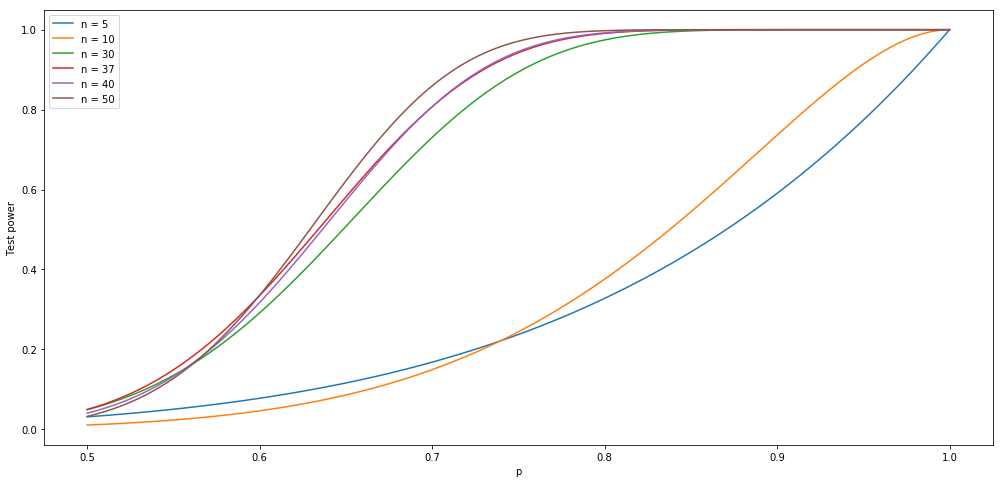

In [34]:
p_s = 0.7
alpha = 0.05
def test_power(n, p_s, alpha=0.05):
    return sps.binom.sf(sps.binom(n=n, p=0.5).ppf(1 - alpha), n=n, p=p_s)
n = [5, 10, 30, 37, 40, 50]
fig = plt.figure(figsize=(17,8))

p = np.linspace(0.5, 1, 100)
for i in range(6):
    plt.plot(p, test_power(n[i], p), label="n = " + str(n[i]))
    plt.xlabel("p")
    plt.ylabel("Test power")
plt.legend(fontsize=10,loc=2)
plt.show()

def find_n_s(p_s):
    best_n = 0
    diff = 100000
    for n in range(300):
        if np.abs(test_power(n, p_s) - 0.8) < diff:
            diff = np.abs(test_power(n, p_s) - 0.8)
            best_n = n
    print(best_n)
    return best_n, diff

In [35]:
n_s, diff = find_n_s(p_s)
print("Наилучшее n: ", n_s)
print("Отличие мощности от 0.8: ", diff)

/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: floating point number truncated to an integer
  temp = special.bdtr(vals1, n, p)
/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in absolute


37
Наилучшее n:  37
Отличие мощности от 0.8:  0.00709569165279


In [36]:
# Проведем эксперимент, аналогичный проведенным ранее.
# 1/2 < p < 0.7
do_task(n_s, 0.58)

n =  37


,t,c,p-value,Отвергаем H_0
0,18,23.0,0.500000,False
1,20,23.0,0.255688,False
2,17,23.0,0.628585,False
3,19,23.0,0.371415,False
4,22,23.0,0.093871,False
5,28,23.0,0.000376,True
6,22,23.0,0.093871,False
7,23,23.0,0.049436,False
8,25,23.0,0.010037,True
9,14,23.0,0.906129,False


In [37]:
# p > 0.7
do_task(n_s, 0.9)

n =  37


,t,c,p-value,Отвергаем H_0
0,32,23.0,5.421971e-07,True
1,33,23.0,6.165646e-08,True
2,34,23.0,5.122274e-09,True
3,32,23.0,5.421971e-07,True
4,36,23.0,7.275958e-12,True
5,37,23.0,0.000000e+00,True
6,31,23.0,3.713765e-06,True
7,31,23.0,3.713765e-06,True
8,33,23.0,6.165646e-08,True
9,35,23.0,2.764864e-10,True


**Вывод:** В первом случае мы в большинстве случаев принимаем гипотезу, а во втором всегда отвергаем.

### Справка для выполнения следующих задач

**Критерий согласия хи-квадрат**

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare>`scipy.stats.chisquare`</a>`(f_obs, f_exp=None, ddof=0)`

`f_obs` --- число элементов выборки, попавших в каждый из интервалов

`f_exp` --- ожидаемое число элементов выборки (по умолчанию равномерное)

`ddof` --- поправка на число степеней свободы. Статистика асимптотически будет иметь распределение хи-квадрат с числом степеней свободы $k - 1 - ddof$, где $k$ --- число интервалов.

Возвращает значение статистики критерия и соответствующее p-value.

**Критерий согласия Колмогорова**

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest>`scipy.stats.kstest`</a>`(rvs, cdf, args=())`

`rvs` --- выборка

`cdf` --- функция распределения (сама функция или ее название)

`args` --- параметры распределения

Возвращает значение статистики критерия и соответствующее p-value.

**Задача 7.**

* Проверьте, что ваша выборка значений скорости ветра из задания 2 действительно согласуется с распределением Вейбулла.

* Проверьте, что при больших $n$ распределение статистики из задач 3 и 4 задания 2 действительно хорошо приближают предельное распределение.

* Проверьте, что остатки в регрессии из задач выше нормальны.

* Подберите класс распределений для выборки количества друзей из задания 1.

Использовать можно два описанных выше критерия, либо любой другой критерий, если будет обоснована необходимость его применения в данной задаче, а так же будет приведено краткое описание критерия.
Уровень значимости взять равным 0.05.

In [38]:
significance_level = 0.05

* **Проверьте, что ваша выборка значений скорости ветра из задания 2 действительно согласуется с распределением Вейбулла.**

In [39]:
sample = np.array([13.4,4.5,12.2,7.4,5.7,5.7,14.6,9,14.4,9.1,7.7,8.7,
12.5,2.3,12.5,6,2.9,6.8,7,6.5,8.5,9.3,9.5,7,
9.3,5.4,13.7,8.6,7.7,7,2.2,8.5,5.4,5.8,7.2,4.3,
4.3,2.3,8.7,2.9,11,11,5.2,8.8,3.8,4.8,5.1,8.9,
8.7,2.6,14,1,9.5,6,4.8,2.8,4.6,2,5.5,7.7,
14.5,0.7,11.7,2.5,6.3,2,6.3,3.5,5.8,3,7,9.2,
10,7.5,8,11.1,2.3,6.5,7.5,8.3,3,7.4,7,16.5,
8.7,8.5,6.3,8.4,6.5,4.7,9.7,6.5,3.4,10.3,8.7,10.7,
12.5,2,8,8,8.3,4.5,11.5,4.8,6,9.9,8.2,11.1,
9.7,5.7,5.2,6.3,5.5,1.1,5.1,3.3,6.2,6.3,7.7,14.6,
2.9,3,5.4,3.4,3.3,4.7,4,5.8,1.5,12.6,7.2,11.1,
6.8,7,6,2.6,4,4.3,5.8,5.5,7.5,9.3,6.8,10.5,
8.5,5.3,7.9,3.6,4.9,3.8,1.7,6.2,3.3,10.3,8.5,8.9,
6.3,10.6,9.4,4.4,4.5,4.5,2,8.3,4.5,6.8,5.3,9.7,
6.8,10,5.7,3.3,4.9,4.3,1.7,5.3,5.8,2,5.5,12,
7,6,8,5.3,7.1,4.2,3.7,6.3,5,9.2,6.5,9.5,
9.1,5.5,8.5,4.3,4,3.4,6.3,7,4.2,7.7,3.3,3,
10.8,6.9,10.6,10.3,3.5,7.1,8.3,6.8,11,0.7,2.6,
12.8,4,12,5.1,11.7,9.8,6.3,3.8,7,5.2,5.5,9.2,
12,4.6,12,4.5,9.9,8.5,7.5,2.5,7.7,4.5,7.7,13,
12.3,11.4,13.2,4.8,7.4,6.2,4,3.5,8,9.5,2.5,12.2,
12,4.4,13,7.4,8,3,3,6.5,10.5,9.7,11.2,4.7,
8.3,2.9,7.7,10.8,5.1,3.5,2.5,4,8,7.2,13.7,2.2,
4.6,3.3,12,2.4,5.2,1.7,3.2,3.5,10,5.7,4,
1.4,11.4,8,4.9,6.2,4.8,10.5,0.5,2,7,5.3,4.9,
0.9,8.8,9.6,4.5,3.2,4,7.7,4,2.2,6,4.5,7,
3.7,8.2,5.7,5.8,4.5,3.5,2.6,5.8,2.7,8.2,3.7,6,
6.9,15,5.2,7.1,6.8,6,8.2,6,3.5,13.2,8,8,
10,3.8,6.9,5.5,8.5,9,7.5,6.8,11.2,7.5,12.6,
9.8,10.7,5.4,7,10.3,10,8.8,7,10.5,1.3,13.4,
8.7,11.7,10.2,12.7,6.3,10])
c=2.270380
scale=7.734840

In [40]:
sps.kstest(sample, sps.weibull_min(c=c, scale=scale).cdf)

KstestResult(statistic=0.023181946111633489, pvalue=0.98998968731065018)

*Действительно, распределение скоростей ветра хорошо согласуется с распределением Вейбулла*

* **Проверьте, что при больших $n$ распределение статистики из задач 3 и 4 задания 2 действительно хорошо приближают предельное распределение.** 

##### №3 a)

In [21]:
theta = 0
sample = sps.norm(loc=theta).rvs(size=(200, 300))
estimation_values = sample.cumsum(axis=1)/np.arange(1, 301, 1.)
print(estimation_values.shape)
statistic_values = (estimation_values-theta) * np.linspace(1, 300, 300) ** 0.5
T_values = statistic_values[:, -1]
sps.kstest(T_values, sps.norm.cdf)

(200, 300)


KstestResult(statistic=0.085167366989248539, pvalue=0.10366636020326792)

*Действительно, распределение статистики хорошо приближает предельное распределение $\mathcal{N}(\theta, 1)$.*

##### №3 b)

In [43]:
theta = 1
sample = sps.poisson.rvs(mu=theta, size=(200, 300))
estimation_values = sample.cumsum(axis=1)/np.arange(1, 301, 1.)
statistic_values = (estimation_values - theta) * np.linspace(1, 300, 300) ** 0.5
T_values = statistic_values[:, -1]
sps.kstest(T_values, sps.norm.cdf)

KstestResult(statistic=0.066979846386019559, pvalue=0.31795143947223226)

*Действительно, распределение статистики хорошо приближает предельное распределение $Pois(\theta)$.*

##### №4

In [38]:
theta = 4
sample = sps.uniform(loc=0, scale=theta).rvs(size=(200, 300))
estimation_values = np.maximum.accumulate(sample, axis=1)
statistic_values = (theta-estimation_values) * np.arange(1, 301, 1)
T_values = statistic_values[:, -1]
sps.kstest(T_values, sps.expon(scale=1/theta).cdf)

KstestResult(statistic=0.76537314559590164, pvalue=0.0)

*Действительно, распределение статистики хорошо приближает предельное распределение $U[0, \theta]$.*

* **Проверьте, что остатки в регрессии из задач выше нормальны.**

Для примера возьмём задачу про мороженое

In [63]:
# Времени нет решить

* **Подберите класс распределений для выборки количества друзей из задания 1.**

In [130]:
sample_str = """[   0.    0.    0.    0.    1.    2.    2.    3.    9.   12.   17.   20.
   20.   20.   24.   26.   29.   30.   32.   32.   36.   37.   39.   40.
   40.   42.   42.   45.   48.   51.   52.   57.   58.   59.   63.   65.
   66.   68.   69.   69.   69.   70.   74.   76.   82.   86.   86.   92.
   96.   99.   99.  100.  103.  104.  105.  106.  106.  107.  111.  111.
  111.  112.  113.  114.  114.  115.  116.  118.  120.  120.  122.  123.
  123.  123.  125.  126.  126.  130.  130.  131.  132.  132.  132.  134.
  135.  135.  136.  136.  137.  137.  137.  139.  141.  141.  141.  145.
  145.  145.  148.  148.  149.  154.  155.  158.  159.  162.  163.  163.
  163.  164.  166.  166.  167.  168.  168.  170.  171.  172.  174.  174.
  176.  179.  179.  180.  180.  180.  183.  183.  185.  188.  191.  192.
  193.  194.  194.  195.  196.  198.  202.  202.  204.  205.  206.  207.
  208.  210.  211.  214.  215.  216.  216.  216.  217.  217.  221.  224.
  229.  237.  241.  241.  243.  247.  248.  250.  250.  252.  258.  260.
  261.  264.  266.  269.  271.  272.  273.  283.  285.  285.  291.  291.
  291.  293.  293.  295.  297.  300.  311.  313.  314.  314.  317.  317.
  318.  320.  322.  323.  325.  326.  327.  335.  337.  340.  344.  345.
  345.  347.  347.  351.  357.  357.  359.  362.  367.  369.  372.  374.
  377.  377.  378.  379.  387.  393.  395.  398.  400.  400.  416.  416.
  421.  436.  442.  446.  452.  453.  455.  479.  480.  481.  486.  490.
  499.  502.  517.  532.  536.  552.  566.  584.  603.  606.  611.  771.
  904.]"""

In [133]:
sample = np.array(sample_str)

/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)



loc = 1.010101, scale = 5.050505


KstestResult(statistic=0.06401103660423102, pvalue=0.098571141711415011)

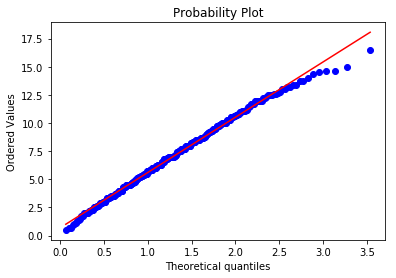

In [64]:
# Удобно смотреть по такому графику 
# (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html)
sps.probplot(x=sample, dist=sps.rayleigh, plot=plt)

# Поиск по сетке с двумя итерациями
mloc, mscale = 0, 0
max_pvalue = 0
for loc in np.linspace(0, 500, 100):
    #print(loc/1000, end=' ')
    for scale in np.linspace(0, 500, 100):
        pvalue = sps.kstest(sample, sps.rayleigh(loc=loc, scale=scale).cdf).pvalue
        if pvalue > max_pvalue:
            max_pvalue = pvalue
            mloc = loc
            mscale = scale
for loc in np.linspace(0, 100, 100):
    #print(loc/1000, end=' ')
    for scale in np.linspace(0, 100, 100):
        pvalue = sps.kstest(sample, sps.rayleigh(loc=loc, scale=scale).cdf).pvalue
        if pvalue > max_pvalue:
            max_pvalue = pvalue
            mloc = loc
            mscale = scale
print()
print("loc = %f, scale = %f"%(mloc, mscale))
sps.kstest(sample, sps.rayleigh(loc=mloc, scale=mscale).cdf)

Внезапно, распределение Релэя подходит по картинке (экспоненциальное и нормальное подходили хуже).
Параметры из поиска по сетке — loc = 1.010101, scale = 5.050505.
Удовлетворяют критерию.

**Вывод:** Критерии хи-квадрат и Колмогорова почти всегда работают.

**Задача 8<font size="5" color="red">\*</font>.** Проведите исследование согласно примеру 2 параграфа 2 главы 18 книги М.Б. Лагутина "Наглядная математическая статистика".

**Задача 9<font size="5" color="red">\*</font>.** 
Изучите Q-Q plot и критерий Шапиро-Уилка для проверки нормальности, напишите их теоретическое пояснение.
В изучении могут помочь материалы курса <a href="http://wiki.cs.hse.ru/%D0%9F%D1%80%D0%B8%D0%BA%D0%BB%D0%B0%D0%B4%D0%BD%D0%BE%D0%B9_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85"> ПСАД</a>.

Постройте графики Q-Q plot для различных распределений и дайте к ним пояснение.
Проверьте различные данные на нормальность с помощью различных критериев и Q-Q plot.
Данные можно использовать из задачи 7 или какие-либо еще, например, отдельные компоненты из Ирисов Фишера.
Постарайтесь так же правильно контролировать вероятность общей ошибки первого рода.